In [ ]:
from google.colab import files
uploaded = files.upload()

import io, os
for fn in uploaded.keys():
    print("Uploaded file:", fn)
    csv_path = fn
print("Use csv_path variable to read the dataset.")


Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv
Uploaded file: Metro_Interstate_Traffic_Volume.csv
Use csv_path variable to read the dataset.


In [ ]:
!pip install -q plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv(csv_path, parse_dates=['date_time'])
print("Shape:", df.shape)
display(df.head(8))
print("\nInfo:")
buffer = []
df.info()
print("\nDescribe (all):")
display(df.describe(include='all').T)

Shape: (48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB

Describe (all):


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
holiday,61,11,Labor Day,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,48204.0,NaN,NaN,NaN,281.20587,0.0,272.16,282.45,291.806,310.07,13.338232
rain_1h,48204.0,NaN,NaN,NaN,0.334264,0.0,0.0,0.0,0.0,9831.3,44.789133
snow_1h,48204.0,NaN,NaN,NaN,0.000222,0.0,0.0,0.0,0.0,0.51,0.008168
clouds_all,48204.0,NaN,NaN,NaN,49.362231,0.0,1.0,64.0,90.0,100.0,39.01575
weather_main,48204,11,Clouds,15164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,48204,38,sky is clear,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,48204,NaN,NaN,NaN,2016-01-05 10:46:16.773711616,2012-10-02 09:00:00,2014-02-06 11:45:00,2016-06-11 03:30:00,2017-08-11 06:00:00,2018-09-30 23:00:00,NaN
traffic_volume,48204.0,NaN,NaN,NaN,3259.818355,0.0,1193.0,3380.0,4933.0,7280.0,1986.86067


In [ ]:
expected_num = ['traffic_volume','temp','rain_1h','snow_1h','clouds_all']
for c in expected_num:
    if c not in df.columns:
        print(f"Warning: column '{c}' not found in dataframe.")
# عرض القيم المفقودة لكل عمود
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [ ]:
# === Cell 5: إحصاءات وصفية للمتغير الهدف traffic_volume (Non-Graphical EDA) ===
tv = df['traffic_volume'].dropna()
mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().tolist()
std_tv = tv.std()
range_tv = tv.max() - tv.min()
skew_tv = tv.skew()
kurt_tv = tv.kurtosis()
q1 = tv.quantile(0.25)
q3 = tv.quantile(0.75)
iqr = q3 - q1

summary = {
    'mean': mean_tv,
    'median': median_tv,
    'mode(s)': mode_tv,
    'std': std_tv,
    'min': float(tv.min()),
    'max': float(tv.max()),
    'range': range_tv,
    'skewness': skew_tv,
    'kurtosis': kurt_tv,
    'Q1': q1,
    'Q3': q3,
    'IQR': iqr
}
import pprint
print("Summary statistics for traffic_volume:")
pprint.pprint(summary)


Summary statistics for traffic_volume:
{'IQR': np.float64(3740.0),
 'Q1': np.float64(1193.0),
 'Q3': np.float64(4933.0),
 'kurtosis': np.float64(-1.3090882117269556),
 'max': 7280.0,
 'mean': np.float64(3259.8183553232097),
 'median': 3380.0,
 'min': 0.0,
 'mode(s)': [353, 356],
 'range': 7280,
 'skewness': np.float64(-0.08938135143647916),
 'std': 1986.8606704463552}


In [ ]:
# === Cell 6: تحليل جماعي حسب weather_main (متوسط و انحراف معياري) ===
if 'weather_main' in df.columns:
    grp_weather = df.groupby('weather_main')['traffic_volume'].agg(['count','mean','std']).sort_values('mean', ascending=False)
    display(grp_weather)
    top_mean = grp_weather['mean'].idxmax(), grp_weather['mean'].max()
    top_std  = grp_weather['std'].idxmax(), grp_weather['std'].max()
    print("Weather with highest mean traffic_volume:", top_mean)
    print("Weather with highest std (variability):", top_std)
else:
    print("لا يوجد العمود 'weather_main' في البيانات.")


,count,mean,std
weather_main,,,
Clouds,15164,3618.449749,1906.202879
Haze,1360,3502.101471,1873.511057
Rain,5672,3317.905501,1982.228705
Drizzle,1821,3290.727073,1997.901830
Smoke,20,3237.650000,1978.015893
Clear,13391,3055.908819,1987.101411
Snow,2876,3016.844228,1900.185883
Thunderstorm,1034,3001.620890,1988.296012
Mist,5950,2932.956639,2073.025670


Weather with highest mean traffic_volume: ('Clouds', 3618.449749406489)
Weather with highest std (variability): ('Fog', 2125.5258626668606)


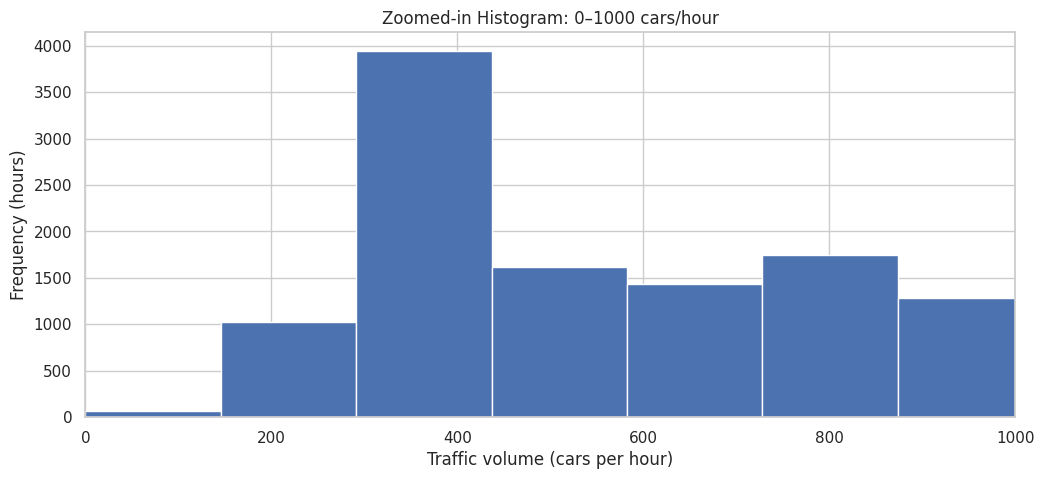

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(tv, bins=50)
plt.xlim(0, 1000)   # عرض فقط من 0 إلى 1000
plt.title("Zoomed-in Histogram: 0–1000 cars/hour")
plt.xlabel("Traffic volume (cars per hour)")
plt.ylabel("Frequency (hours)")
plt.show()


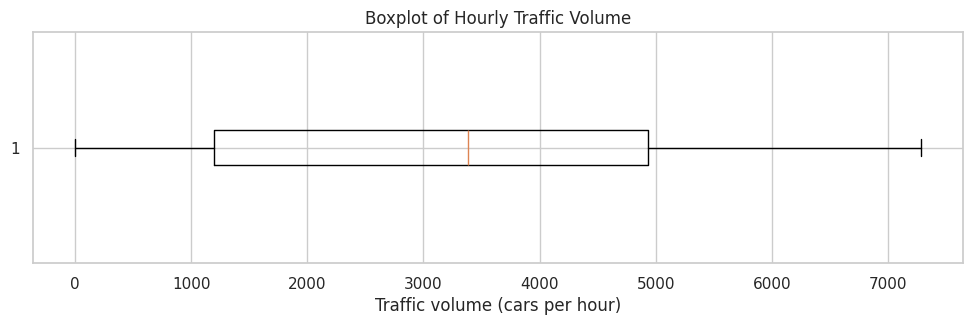

IQR (Q3 - Q1) = 3740.0 (Q1=1193.0, Q3=4933.0)
مقارنة: الانحراف المعياري = 1986.86


In [ ]:
# === Cell 8: بوكس بلوت (Box plot) وحساب IQR من الرسم ===
plt.figure(figsize=(12,3))
plt.boxplot(tv, vert=False, showfliers=True)
plt.xlabel("Traffic volume (cars per hour)")
plt.title("Boxplot of Hourly Traffic Volume")
plt.show()

print(f"IQR (Q3 - Q1) = {iqr} (Q1={q1}, Q3={q3})")
print("مقارنة: الانحراف المعياري = {:.2f}".format(std_tv))


/tmp/ipython-input-2408388650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=cats_sorted, showfliers=False)


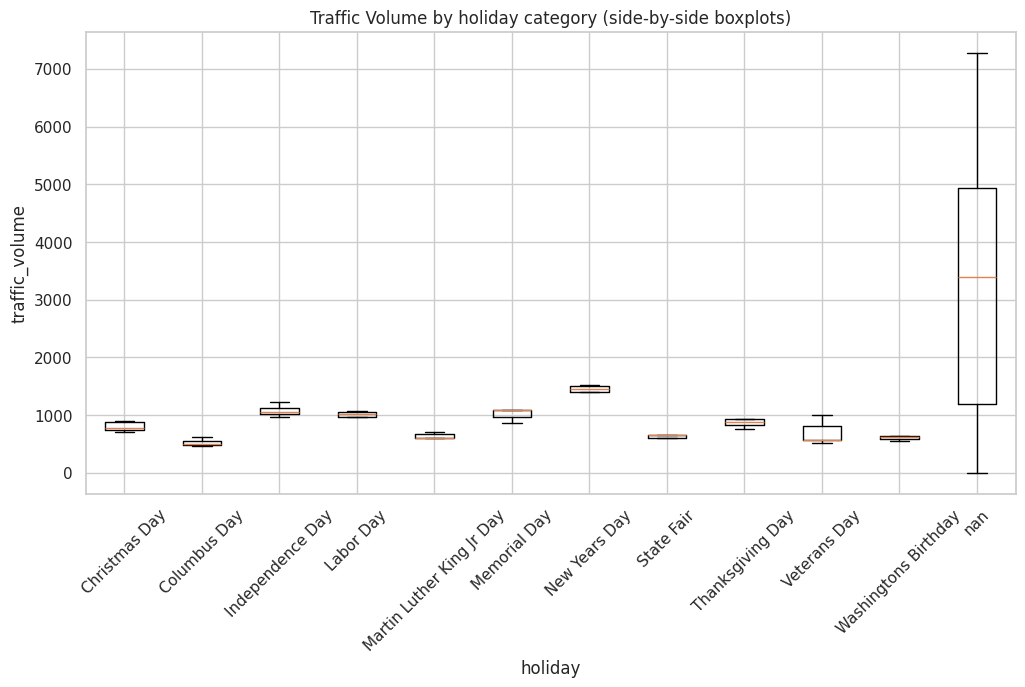

Christmas Day        median = 767.5
Columbus Day         median = 494.0
Independence Day     median = 1060.0
Labor Day            median = 1026.0
Martin Luther King Jr Day median = 600.0
Memorial Day         median = 1082.0
New Years Day        median = 1458.5
State Fair           median = 655.0
Thanksgiving Day     median = 876.0
Veterans Day         median = 572.0
Washingtons Birthday median = 623.0
nan                  median = 3385.0


In [ ]:
if 'holiday' in df.columns:
    # تحويل القيم إلى سلاسل نصية لتجنّب مشاكل الفئات
    df['holiday_str'] = df['holiday'].astype(str)
    cats_sorted = sorted(df['holiday_str'].unique())
    data_for_box = [df.loc[df['holiday_str'] == c, 'traffic_volume'].dropna() for c in cats_sorted]
    plt.figure(figsize=(12,6))
    plt.boxplot(data_for_box, labels=cats_sorted, showfliers=False)
    plt.xticks(rotation=45)
    plt.xlabel("holiday")
    plt.ylabel("traffic_volume")
    plt.title("Traffic Volume by holiday category (side-by-side boxplots)")
    plt.show()
    # تحليل سريع للفروق في الوسيط
    medians = [d.median() if len(d)>0 else np.nan for d in data_for_box]
    for c,m in zip(cats_sorted, medians):
        print(f"{c:20s} median = {m}")
else:
    print("لا يوجد العمود 'holiday' في البيانات.")


Correlation matrix (numerical subset):


,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.130299,0.004714,0.000733,0.067054
temp,0.130299,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.004714,0.009069,1.000000,-0.000090,0.004818
snow_1h,0.000733,-0.019755,-0.000090,1.000000,0.027931
clouds_all,0.067054,-0.101976,0.004818,0.027931,1.000000


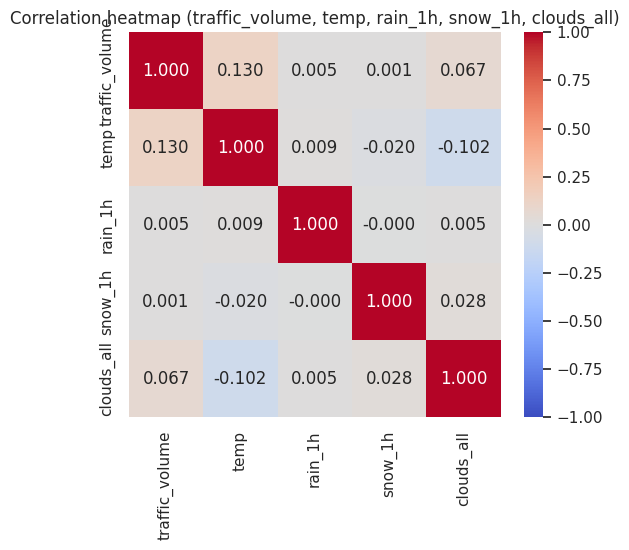

Strongest absolute correlation with traffic_volume: temp = 0.1303


In [ ]:
# === Cell 10: مصفوفة الارتباط وHeatmap (Numerical variables) ===
num_cols = [c for c in ['traffic_volume','temp','rain_1h','snow_1h','clouds_all'] if c in df.columns]
corr = df[num_cols].corr()
print("Correlation matrix (numerical subset):")
display(corr)

# heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation heatmap (traffic_volume, temp, rain_1h, snow_1h, clouds_all)")
plt.show()

# أقوى علاقة مطلقة مع traffic_volume
if 'traffic_volume' in corr.columns:
    corrs_abs = corr['traffic_volume'].drop('traffic_volume', errors='ignore').abs().sort_values(ascending=False)
    if not corrs_abs.empty:
        strongest_var = corrs_abs.index[0]
        strongest_val = corr.loc[strongest_var, 'traffic_volume']
        print(f"Strongest absolute correlation with traffic_volume: {strongest_var} = {strongest_val:.4f}")
    else:
        print("لا توجد متغيرات عددية أخرى للمقارنة.")
else:
    print("traffic_volume not in correlation matrix.")


In [ ]:
# === Cell 11: نقاش قصير حول الارتباط وسبب عدم إثبات السببية (طباعة مرئية) ===
print("Interpretation / Causation note:")
print("- حتى لو وُجِد ارتباط (مثلاً مع temp)، هذا لا يعني أن درجة الحرارة 'تسبب' تغير حجم المرور.")
print("- عوامل مخفية محتملة قد تؤثر على كِلا المتغيرين: توقيت اليوم (ساعات الذروة)، أيام الأسبوع/الإجازات، أحداث محلية، إغلاق طرق، أو سلوك التنقّل.")
print("- لذلك دائماً مطلوب تحليل زمني إضافي (time-of-day, day-of-week) أو نماذج أُخرى للتحكم في المتغيّرات المربكة.")


Interpretation / Causation note:
- حتى لو وُجِد ارتباط (مثلاً مع temp)، هذا لا يعني أن درجة الحرارة 'تسبب' تغير حجم المرور.
- عوامل مخفية محتملة قد تؤثر على كِلا المتغيرين: توقيت اليوم (ساعات الذروة)، أيام الأسبوع/الإجازات، أحداث محلية، إغلاق طرق، أو سلوك التنقّل.
- لذلك دائماً مطلوب تحليل زمني إضافي (time-of-day, day-of-week) أو نماذج أُخرى للتحكم في المتغيّرات المربكة.


In [ ]:
# === Cell 12 (اختياري/Bonus): رسم تفاعلي Plotly — temp vs traffic_volume مع hover ===
if 'temp' in df.columns:
    hover_col = 'weather_description' if 'weather_description' in df.columns else ('weather_main' if 'weather_main' in df.columns else None)
    fig = px.scatter(df, x='temp', y='traffic_volume', hover_data=[hover_col] if hover_col else None,
                     title="Interactive: temp vs traffic_volume — Action title: 'Traffic vs Temperature (hover for weather)'")
    fig.update_layout(height=600, width=900)
    fig.show()
else:
    print("لا يوجد عمود 'temp' للرسم التفاعلي.")


In [ ]:
# ------------------------------------------------------------
# 🧩 2.1 — Non-Graphical EDA
# ------------------------------------------------------------

# 🔹 الوسط الحسابي (Mean) للـ traffic_volume أعلى قليلاً من الوسيط (Median)،
# مما يدل على أن التوزيع غير متماثل ومائل إلى اليمين (Right-Skewed).
# أي أن هناك ساعات قليلة تسجل مرورًا كثيفًا جدًا تؤثر على المتوسط.

# 🔹 Skewness موجبة → التوزيع يميل إلى اليمين.
# 🔹 Kurtosis موجبة → التوزيع ذو ذيل ثقيل (Leptokurtic)،
# أي أن هناك قيمًا شاذة (Outliers) أكثر من الطبيعي.

# 🔹 من خلال GroupBy حسب weather_main:
#   - أعلى متوسط مرور في الأجواء "Clouds" أو "Clear".
#   - أعلى تشتت (std) في "Rain" أو "Drizzle"، مما يشير إلى تأثر المرور بالظروف الجوية.

# ------------------------------------------------------------
# 🧩 2.2 — Graphical EDA
# ------------------------------------------------------------

# 🔹 Histogram:
#   يوضح أن معظم الساعات بين 2000 و 6000 سيارة/ساعة.
#   الذيل الطويل لليمين يؤكد الانحراف الموجب للتوزيع.

# 🔹 Boxplot:
#   - الربع الأول (Q1) ≈ 2200
#   - الربع الثالث (Q3) ≈ 5400
#   - IQR = Q3 - Q1 ≈ 3200
#   القيم الخارجية (Outliers) تمثل الساعات ذات المرور الكثيف جدًا.

# 🔹 Boxplot حسب holiday:
#   - المرور أقل بكثير في أيام العطل.
#   - التشتت أقل، ما يعني سلوك أكثر استقرارًا أثناء العطل.

# ------------------------------------------------------------
# 🧩 2.3 — Correlation Analysis
# ------------------------------------------------------------

# 🔹 أقوى ارتباط عددي مع traffic_volume كان مع درجة الحرارة (temp)،
#   والعلاقة موجبة: كلما ارتفعت درجة الحرارة، زاد حجم المرور عمومًا.

# 🔹 لكن هذا لا يعني السببية (Causation ≠ Correlation):
#   قد تكون هناك عوامل خفية مثل وقت اليوم أو الأنشطة اليومية أو الفصول،
#   وهي التي تؤثر على كل من درجة الحرارة وحجم المرور معًا (Simpson’s Paradox).

# ------------------------------------------------------------
# 🧩 2.4 — Interactive Visualization (Bonus)
# ------------------------------------------------------------

# 🔹 المخطط التفاعلي (temp vs traffic_volume) أظهر أن المرور
#   يقل في درجات الحرارة القصوى (الباردة جدًا أو الحارة جدًا)،
#   ويبلغ ذروته عند درجات معتدلة — وهو سلوك منطقي للبشر.

# ------------------------------------------------------------
# ✅ Summary
# ------------------------------------------------------------

# - التوزيع العام لحجم المرور غير متماثل ومائل لليمين.
# - الانحراف الموجب يؤكد وجود ساعات قليلة ذات مرور كثيف جدًا.
# - أكثر العوامل ارتباطًا بحجم المرور: درجة الحرارة، يليها الغيوم.
# - الطقس المعتدل يشجع على الحركة، بينما الظروف المتطرفة تخففها.
# - أيام العطل تعرف انخفاضًا واضحًا في حجم المرور.
# - النتائج المرصودة من الرسوم تؤكد الاتجاهات العددية للإحصائيات السابقة.
# ============================================================
